# <center> 🏙️ Olimpo 🏙️ </center>
### <center> Teste A/B </center>

## 0. Configurações e Variáveis

### 0.1. Importações

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
from scipy import stats

### 0.2. Variáveis

In [23]:
# Leitura do teste A armazenado no excel
teste_a = pd.read_excel('./Excel/Teste AB.xlsx', sheet_name='Teste A').drop(columns='Num')

# Leitura do teste B armazenado no excel em uma planilha diferente
teste_b = pd.read_excel('./Excel/Teste AB.xlsx', sheet_name='Teste B').drop(columns='Num')

In [24]:
significancia = 0.05
confianca = 0.95
tcritico = 1.697 # Tirado da tabela

## 1. Teste A

In [25]:
# Calculando as médias
media_A = np.mean(teste_a)
media_B = np.mean(teste_b)

# Calculando erro padrão para intervalos de confiança
erro_padrao_A = np.sqrt((media_A * (1 - media_A)) / teste_a['Tempo'])
erro_padrao_B = np.sqrt((media_B * (1 - media_B)) / teste_b['Tempo'])

# Intervalos de confiança de 95%
intervalo_A = norm.interval(confianca, loc=media_A, scale=erro_padrao_A)
intervalo_B = norm.interval(confianca, loc=media_B, scale=erro_padrao_B)

In [26]:
# H0 = b >= a
# H1 = b < a

# Realizar o teste t
t_stat, p_valor = stats.ttest_ind(teste_a, teste_b)

print(f'Estatística t: {t_stat}')
print(f'Valor p: {p_valor}')

if p_valor < tcritico:
    print("A diferença é estatisticamente significativa. Podemos rejeitar a hipótese nula.")
else:
    print("A diferença não é estatisticamente significativa. Não podemos rejeitar a hipótese nula.")

Estatística t: [-2.50987797]
Valor p: [0.01891853]
A diferença é estatisticamente significativa. Podemos rejeitar a hipótese nula.


In [27]:
# Concatenando os dataframes para facilitar a plotagem
teste_a['grupo'] = 'A'
teste_b['grupo'] = 'B'
dois = pd.concat([teste_a, teste_b])

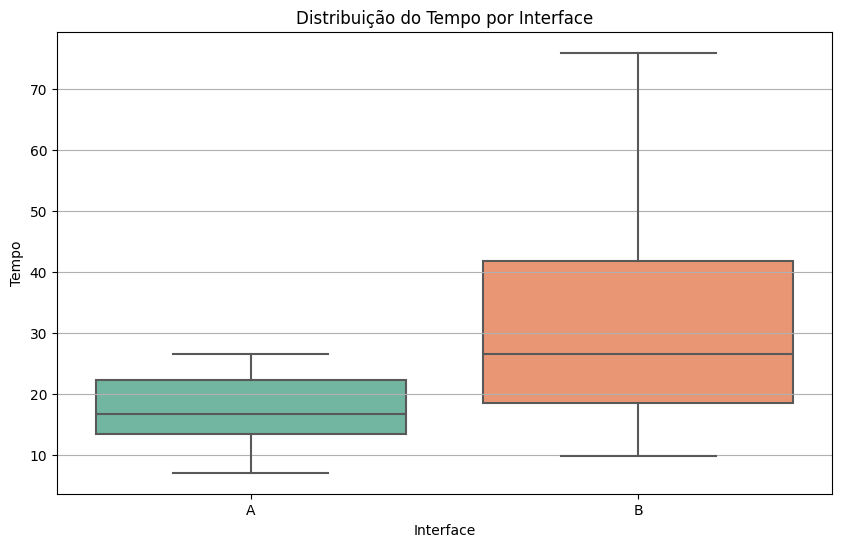

In [28]:
# Distribuição dos testes
plt.figure(figsize=(10, 6))
sns.boxplot(x='grupo', y='Tempo', data=dois, palette="Set2")
plt.title('Distribuição do Tempo por Interface')
plt.xlabel('Interface')
plt.ylabel('Tempo')
plt.grid(axis='y')